# Encontrar los siguientes conjuntos de datos y presentarlos de una manera conveniente.

### Sección de importación.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import sqlite3

In [2]:
# Carga del dataframe, asignación de fechas como índice e inferencia de las fechas.
df = pd.read_csv("sales_data.csv", parse_dates=["Order Date"], infer_datetime_format=True, index_col="Order Date")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185950 entries, 2019-01-22 21:25:00 to 2019-12-21 21:45:00
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Product_ean       185950 non-null  float64
 3   catégorie         185950 non-null  object 
 4   Purchase Address  185950 non-null  object 
 5   Quantity Ordered  185950 non-null  int64  
 6   Price Each        185950 non-null  float64
 7   Cost price        185950 non-null  float64
 8   turnover          185950 non-null  float64
 9   margin            185950 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 15.6+ MB
None


In [3]:
# muestra de los primeros elementos del dataframe
display(df.head(10))

,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
Order Date,,,,,,,,,,
2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950
2019-01-29 20:22:00,141239,AAA Batteries (4-pack),2.953869e+12,Alimentation,"775 Willow St, San Francisco, CA 94016",1,2.99,1.4950,2.99,1.4950
2019-01-26 12:16:00,141240,27in 4K Gaming Monitor,5.173671e+12,Vêtements,"979 Park St, Los Angeles, CA 90001",1,389.99,128.6967,389.99,261.2933
2019-01-05 12:04:00,141241,USB-C Charging Cable,8.051737e+12,Vêtements,"181 6th St, San Francisco, CA 94016",1,11.95,5.9750,11.95,5.9750
2019-01-01 10:30:00,141242,Bose SoundSport Headphones,1.508418e+12,Électronique,"867 Willow St, Los Angeles, CA 90001",1,99.99,49.9950,99.99,49.9950


In [4]:
# Inicio y final del periodo.
print("Primer registro:\n", df.loc[df.index.min()], "\n")
print("Último registro:\n", df.loc[df.index.max()], "\n")

Primer registro:
 Order ID                                        147268
Product                               Wired Headphones
Product_ean                            4648137102501.0
catégorie                                       Sports
Purchase Address    9 Lake St, New York City, NY 10001
Quantity Ordered                                     1
Price Each                                       11.99
Cost price                                       5.995
turnover                                         11.99
margin                                           5.995
Name: 2019-01-01 03:07:00, dtype: object 

Último registro:
                      Order ID                     Product   Product_ean  \
Order Date                                                                
2020-01-01 05:13:00    300519  Bose SoundSport Headphones  3.356582e+12   
2020-01-01 05:13:00    300519    Lightning Charging Cable  6.964553e+12   

                        catégorie                        Purchase Addr

### - 10 productos más vendidos durante todo el periodo.

In [5]:
# Se van a cargar los 10 productos que más se vendieron de todo el dataset (1 año)
vendidos10 = df.groupby("Product")["Quantity Ordered"].sum().sort_values(ascending=False).head(10)
print("Los 10 productos más vendidos durante todo el periodo:\n")
print(vendidos10)

Los 10 productos más vendidos durante todo el periodo:

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
Name: Quantity Ordered, dtype: int64


## - 10 productos que generan mayores ventas.

In [6]:
# Se van a guardar los 10 productos que representaron las mayores ventas en el año
mayores = df.groupby("Product")[["Quantity Ordered", "Price Each"]].sum()
mayores10 = mayores["Quantity Ordered"] * mayores["Price Each"]
print("Los 10 productos que generan mayores ventas:\n")
print(mayores10.sort_values(ascending=False).head(10))

Los 10 productos que generan mayores ventas:

Product
Macbook Pro Laptop            3.796962e+10
Apple Airpods Headphones      3.652693e+10
iPhone                        3.280260e+10
Google Phone                  1.833858e+10
Bose SoundSport Headphones    1.792966e+10
ThinkPad Laptop               1.704847e+10
27in 4K Gaming Monitor        1.517066e+10
34in Ultrawide Monitor        1.455970e+10
27in FHD Monitor              8.501111e+09
Lightning Charging Cable      7.517365e+09
dtype: float64


## - Los 10 productos que generan mayor utilidad en ventas

In [7]:
# Se van a guardar los 10 productos que generaron más utilidades en el año
utilidades = df.groupby("Product")[["Quantity Ordered", "margin"]].sum()
mayutil = utilidades["Quantity Ordered"] * utilidades["margin"]
print("Los 10 productos que generan mayores utilidades:\n")
print(mayutil.sort_values(ascending=False).head(10))

Los 10 productos que generan mayores utilidades:

Product
Macbook Pro Laptop            2.546119e+10
iPhone                        2.200023e+10
Apple Airpods Headphones      1.287651e+10
Google Phone                  1.230242e+10
ThinkPad Laptop               1.142801e+10
27in 4K Gaming Monitor        1.018718e+10
34in Ultrawide Monitor        9.783410e+09
Bose SoundSport Headphones    9.053637e+09
Flatscreen TV                 4.667775e+09
Lightning Charging Cable      4.029242e+09
dtype: float64


## - Utilidad en venta global por periodo mensual

{'Enero': 1145583.6119999997, 'Febrero': 1384793.9588999997, 'Marzo': 1760350.298, 'Abril': 2137206.9735, 'Mayo': 1986003.9882999996, 'Junio': 1620420.4871, 'Julio': 1660914.6464, 'Agosto': 1412418.6483999998, 'Septiembre': 1314919.1408999998, 'Octubre': 2350533.3620999996, 'Noviembre': 2005133.4616999999, 'Diciembre': 2898749.5895}


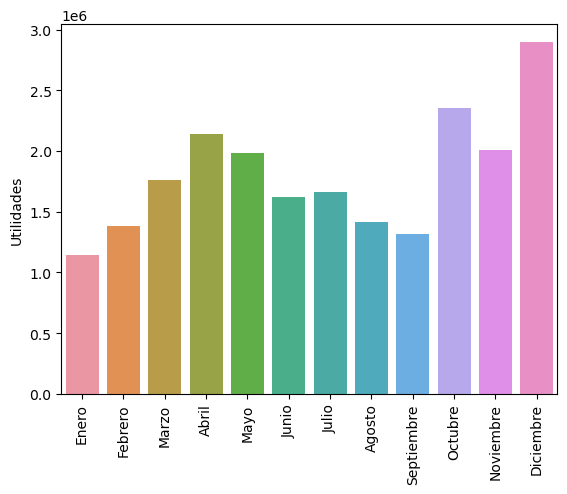

In [8]:
# Se va a mostrar la venta global por cada mes
df_por_mes = df.groupby(by=df.index.month)
utilidades = []
for mes in df_por_mes:
    df_mes = mes[1]
    utilidad = df_mes["Quantity Ordered"] * df_mes["margin"]
    utilidades.append((mes[0],utilidad.sum()))
dictMeses = {1:"Enero", 2:"Febrero", 3:"Marzo", 4:"Abril",5:"Mayo",6:"Junio",7:"Julio",8:"Agosto",\
             9:"Septiembre", 10:"Octubre", 11:"Noviembre", 12:"Diciembre"}
dictMesesUtilidades = {dictMeses.get(elemento):valor for elemento, valor in utilidades}
print(dictMesesUtilidades)
dfMesesUtilidades = pd.DataFrame.from_dict(dictMesesUtilidades, columns=["Utilidades"], orient="index")
ax = sns.barplot(data=dfMesesUtilidades, y="Utilidades", x=dfMesesUtilidades.index)
ax.set_xticklabels(labels=dfMesesUtilidades.index, rotation=90)
plt.show()

In [9]:
# Utilidades totales del año:
print("Utilidades totales:", sum([element[1] for element in utilidades]))

Utilidades totales: 21677028.166799996


## - Utilidad en venta global por periodo anual por cada categoría

In [10]:
categorias = df["catégorie"].unique()
print(categorias)

['Vêtements' 'Alimentation' 'Sports' 'Électronique']


<class 'pandas.core.series.Series'>
catégorie
Alimentation    5.408101e+06
Sports          5.442272e+06
Vêtements       5.412806e+06
Électronique    5.413849e+06
Name: utilidades, dtype: float64
Utilidades totales: 21677028.1668


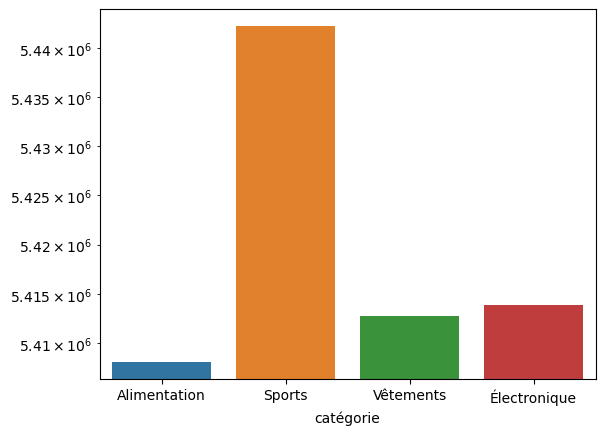

In [11]:
# Se va a presentar la venta global anual por cada categoría.
df_utilidades = df.copy()
df_utilidades["utilidades"] = df["margin"] * df["Quantity Ordered"]
df_utilidades["utilidades"] = df_utilidades["utilidades"]
df_utilidades_cat = df_utilidades.groupby(by="catégorie")["utilidades"].sum()
print(type(df_utilidades_cat))
print(df_utilidades_cat)
ax = sns.barplot(x=df_utilidades_cat.index, y=df_utilidades_cat.values)
ax.set_yscale("log")
print("Utilidades totales:", df_utilidades_cat.sum())

# A partir de los conjuntos de datos encontrados determinar y graficar.

## Del producto más vendido encontrar la tendencia en ventas y predecir la venta esperada en los próximos 3 meses

Baterias solamente


<Axes: xlabel='Order Date'>

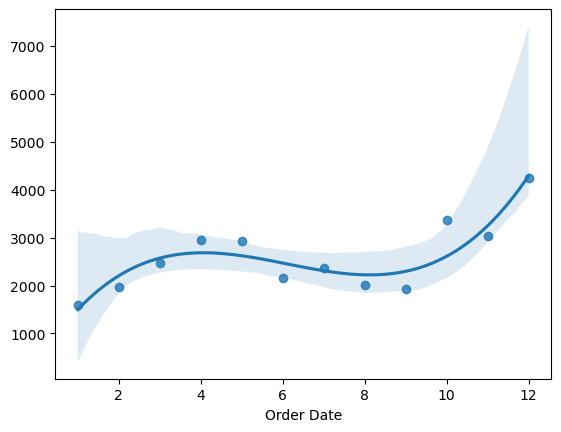

In [12]:
# El producto más vendido era "AAA Batteries (4-pack)"
# Hay que sacar las ventas (no valor de ventas) que hubieron por mes, 
# posteriormente usar esos datos regresión.
# A modo de ejemplo solamente, haré una regresión lineal (polinomial) a partir de los datos obtenidos
# de venta por mes.
# Si se requiere, más adelante puedo usar un modelo más complejo para intentar realizar predicciones
# más precisas, de momento solo se probará con esto.

print("Baterias solamente")
df_batteries = df[df["Product"]=="AAA Batteries (4-pack)"]
df_batt_month = df_batteries.groupby(df_batteries.index.month)["Quantity Ordered"].sum()
sns.regplot(x=df_batt_month.index, y=df_batt_month.values, order=3)

In [13]:
polinomial = PolynomialFeatures(degree=3, include_bias=False)
X = df_batt_month.index.values.reshape(-1,1)
car_polinomial = polinomial.fit_transform(X)
y = df_batt_month.values

linear = LinearRegression().fit(car_polinomial,y)
y_predict = linear.predict(car_polinomial)

print("Valores predichos", y_predict)
# Considerando los meses siguientes como 13 (enero), 14 (febrero)...
# La predicción usando regresión logística es:

Valores predichos [1496.15384615 2203.15384615 2571.02797203 2682.62237762 2620.78321678
 2468.35664336 2308.18881119 2223.12587413 2296.01398601 2609.6993007
 3247.02797203 4290.84615385]


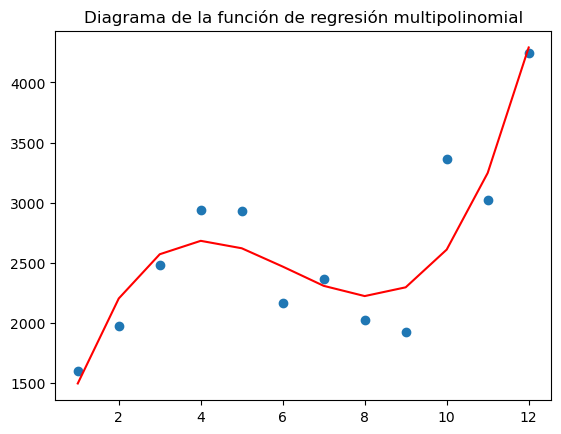

In [14]:
plt.title("Diagrama de la función de regresión multipolinomial")
plt.scatter(X, y)
plt.plot(X, y_predict, c="red")

plt.show()

In [15]:
X_test = [13,14,15]
X_test = polinomial.fit_transform(np.array(X_test).reshape(-1,1))
y_predict1 = linear.predict(X_test)
# Predicciones para los meses siguientes
print("Predicciones para los meses siguientes:\n")
for index, element in enumerate(y_predict1):
    print(index+13, element)

Predicciones para los meses siguientes:

13 5823.99999999993
14 7929.33566433559
15 10689.699300699212


## Del producto con el mayor margen de utilidad encontrar la tendencia y predecir la utilidad esperada en los próximos 3 meses

In [16]:
# Obtener el producto con mayor margen de utilidad.
producto = df.sort_values(by="margin", ascending=False).head(1)
producto["Product"]

Order Date
2019-05-13 13:40:00    Macbook Pro Laptop
Name: Product, dtype: object

In [17]:
# El producto con mayor utilidad es "Macbook Pro Laptop"
# Hay que sacar la utilidad que hubo por mes (de ese producto), 
# posteriormente usar esos datos regresión.
# A modo de ejemplo solamente, haré una regresión lineal (polinomial) a partir de los datos obtenidos 
# de venta por mes.
# Si se requiere, más adelante puedo usar un modelo más complejo para intentar realizar predicciones.

print("Macbook Pro Laptop solamente")
df_macs = df[df["Product"]=="Macbook Pro Laptop"]
df_macs_month = df_macs.groupby(df_macs.index.month).apply(lambda x: x["Quantity Ordered"]*x["margin"])
print(df_macs_month.sum(level=0))
#sns.regplot(x=df_batt_month.index, y=df_batt_month.values, order=3)


Macbook Pro Laptop solamente
Order Date
1     267665.0
2     314364.0
3     431681.0
4     521662.0
5     531913.0
6     407762.0
7     419152.0
8     340561.0
9     328032.0
10    597975.0
11    501160.0
12    732377.0
dtype: float64


C:\Users\YURECUARO\AppData\Local\Temp\ipykernel_46428\809621041.py:11: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  print(df_macs_month.sum(level=0))


<Axes: >

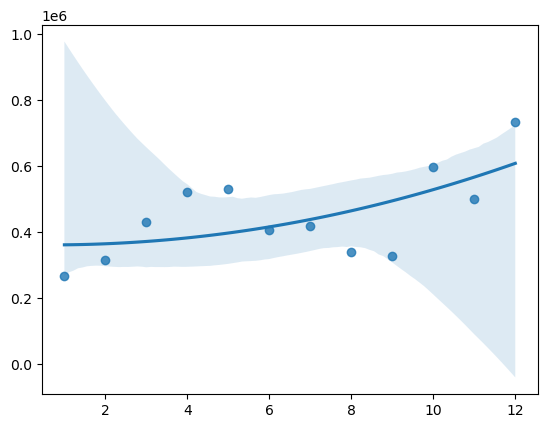

In [18]:
meses = df_macs_month.groupby(level=0).sum().values
valores = df_macs_month.index.get_level_values(0).unique().values

sns.regplot(x=valores, y=meses, order=2)

In [19]:
polinomial = PolynomialFeatures(degree=2, include_bias=False)
X = np.array(valores).reshape(-1,1)
car_polinomial = polinomial.fit_transform(X)
y = meses

linear = LinearRegression().fit(car_polinomial,y)
y_predict = linear.predict(car_polinomial)

print("Valores predichos", y_predict)

Valores predichos [361344.62087912 364504.46403596 371526.21128871 382409.86263736
 397155.41808192 415762.87762238 438232.24125874 464563.50899101
 494756.68081918 528811.75674326 566728.73676324 608507.62087912]


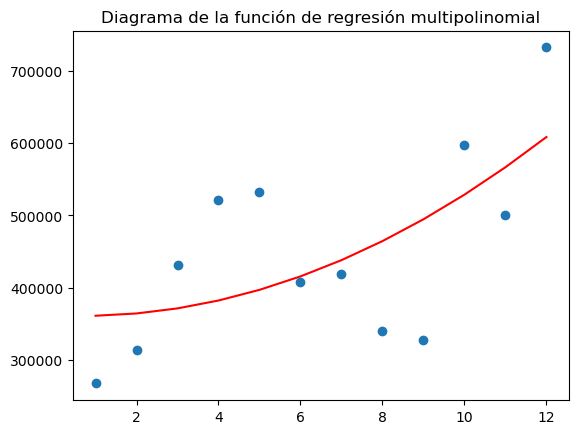

In [20]:
#print(X, X.ravel())
plt.title("Diagrama de la función de regresión multipolinomial")
plt.scatter(X, y)
plt.plot(X, y_predict, c="red")
plt.show()

In [21]:
X_test = [13,14,15]
X_test = polinomial.fit_transform(np.array(X_test).reshape(-1,1))
y_predict2 = linear.predict(X_test)
# Predicciones para los meses siguientes
print("Predicciones para los meses siguientes:\n")
for index, element in enumerate(y_predict2):
    print(index+13, element)

Predicciones para los meses siguientes:

13 654148.409090909
14 703651.1013986012
15 757015.6978021977


# Diseñar una base de datos simple para almacenar los resultados obtenidos en los ejercicios 1 y 2 

In [22]:
# Aprovechando que todo está construido sobre pandas, voy a utilizar sqlite.
con = sqlite3.connect("ejercicios.db")
cur = con.cursor()

# Creación de una tabla para guardar las predicciones
cur.execute("CREATE TABLE IF NOT EXISTS mayorVendidos(Proucto, CantidadDeVentas)")
cur.execute("CREATE TABLE IF NOT EXISTS mayorValorVentas(Producto, ValorVentas)")
cur.execute("CREATE TABLE IF NOT EXISTS mayorUtilidad(Producto, Utilidad)")

In [23]:
# Recordando:
# 10 más vendidos
print("10 más vendidos\n")
print(vendidos10, "\n")
# 10 que generan mayor valor de ventas
print("10 que generan mayor valor de ventas\n")
print(mayores10, "\n")
# 10 que generan mayor utilidad
print("10 que generan mayor utilidad\n")
print(mayutil, "\n")

10 más vendidos

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
Name: Quantity Ordered, dtype: int64 

10 que generan mayor valor de ventas

Product
20in Monitor                  1.862464e+09
27in 4K Gaming Monitor        1.517066e+10
27in FHD Monitor              8.501111e+09
34in Ultrawide Monitor        1.455970e+10
AA Batteries (4-pack)         2.183598e+09
AAA Batteries (4-pack)        1.914263e+09
Apple Airpods Headphones      3.652693e+10
Bose SoundSport Headphones    1.792966e+10
Flatscreen TV                 6.939360e+09
Google Phone                  1.833858e+10
LG Dryer                      2.503896e+08
LG Washing Machine            2.661336e+08
Lightning Char

In [24]:
datosMayorVendidos = [(element1, element2) for element1,element2 in vendidos10.items()]
print(datosMayorVendidos)
cur.executemany("INSERT INTO mayorVendidos VALUES(?,?)", datosMayorVendidos)

[('AAA Batteries (4-pack)', 31017), ('AA Batteries (4-pack)', 27635), ('USB-C Charging Cable', 23975), ('Lightning Charging Cable', 23217), ('Wired Headphones', 20557), ('Apple Airpods Headphones', 15661), ('Bose SoundSport Headphones', 13457), ('27in FHD Monitor', 7550), ('iPhone', 6849), ('27in 4K Gaming Monitor', 6244)]


In [25]:
res = cur.execute("SELECT * FROM mayorVendidos")
res.fetchall()

[('AAA Batteries (4-pack)', 31017),
 ('AA Batteries (4-pack)', 27635),
 ('USB-C Charging Cable', 23975),
 ('Lightning Charging Cable', 23217),
 ('Wired Headphones', 20557),
 ('Apple Airpods Headphones', 15661),
 ('Bose SoundSport Headphones', 13457),
 ('27in FHD Monitor', 7550),
 ('iPhone', 6849),
 ('27in 4K Gaming Monitor', 6244)]

In [26]:
datosMayorValorVenta = [(element1, element2) for element1,element2 in mayores10.items()]
print(datosMayorValorVenta)
cur.executemany("INSERT INTO mayorValorVentas VALUES(?,?)", datosMayorValorVenta)

[('20in Monitor', 1862463859.71), ('27in 4K Gaming Monitor', 15170657798.800001), ('27in FHD Monitor', 8501110721.500001), ('34in Ultrawide Monitor', 14559704059.81), ('AA Batteries (4-pack)', 2183598316.7999997), ('AAA Batteries (4-pack)', 1914263472.0300002), ('Apple Airpods Headphones', 36526933350.0), ('Bose SoundSport Headphones', 17929659354.75), ('Flatscreen TV', 6939360000.0), ('Google Phone', 18338580000.0), ('LG Dryer', 250389600.0), ('LG Washing Machine', 266133600.0), ('Lightning Charging Cable', 7517365100.7), ('Macbook Pro Laptop', 37969622400.0), ('ThinkPad Laptop', 17048469513.6), ('USB-C Charging Cable', 6275236878.749999), ('Vareebadd Phone', 1708168000.0), ('Wired Headphones', 4654005715.26), ('iPhone', 32802600600.0)]


In [27]:
res = cur.execute("SELECT * FROM mayorValorVentas")
res.fetchall()

[('20in Monitor', 1862463859.71),
 ('27in 4K Gaming Monitor', 15170657798.800001),
 ('27in FHD Monitor', 8501110721.500001),
 ('34in Ultrawide Monitor', 14559704059.81),
 ('AA Batteries (4-pack)', 2183598316.7999997),
 ('AAA Batteries (4-pack)', 1914263472.0300002),
 ('Apple Airpods Headphones', 36526933350.0),
 ('Bose SoundSport Headphones', 17929659354.75),
 ('Flatscreen TV', 6939360000.0),
 ('Google Phone', 18338580000.0),
 ('LG Dryer', 250389600.0),
 ('LG Washing Machine', 266133600.0),
 ('Lightning Charging Cable', 7517365100.7),
 ('Macbook Pro Laptop', 37969622400.0),
 ('ThinkPad Laptop', 17048469513.6),
 ('USB-C Charging Cable', 6275236878.749999),
 ('Vareebadd Phone', 1708168000.0),
 ('Wired Headphones', 4654005715.26),
 ('iPhone', 32802600600.0)]

In [28]:
datosMayorUtilidad = [(element1, element2) for element1,element2 in mayutil.items()]
print(datosMayorUtilidad)
cur.executemany("INSERT INTO mayorUtilidad VALUES(?,?)", datosMayorUtilidad)

[('20in Monitor', 656313008.2564999), ('27in 4K Gaming Monitor', 10187181940.3088), ('27in FHD Monitor', 2992431741.2499995), ('34in Ultrawide Monitor', 9783409749.6733), ('AA Batteries (4-pack)', 1466290992.0), ('AAA Batteries (4-pack)', 1438271162.055), ('Apple Airpods Headphones', 12876513352.5), ('Bose SoundSport Headphones', 9053636995.755), ('Flatscreen TV', 4667774961.0), ('Google Phone', 12302415648.0), ('LG Dryer', 167761032.0), ('LG Washing Machine', 178309512.0), ('Lightning Charging Cable', 4029242440.2749996), ('Macbook Pro Laptop', 25461187776.0), ('ThinkPad Laptop', 11428008718.77), ('USB-C Charging Cable', 3434433734.375), ('Vareebadd Phone', 1146135232.0), ('Wired Headphones', 2533428542.755), ('iPhone', 22000227669.0)]


In [29]:
res = cur.execute("SELECT * FROM mayorUtilidad")
res.fetchall()

[('20in Monitor', 656313008.2564999),
 ('27in 4K Gaming Monitor', 10187181940.3088),
 ('27in FHD Monitor', 2992431741.2499995),
 ('34in Ultrawide Monitor', 9783409749.6733),
 ('AA Batteries (4-pack)', 1466290992.0),
 ('AAA Batteries (4-pack)', 1438271162.055),
 ('Apple Airpods Headphones', 12876513352.5),
 ('Bose SoundSport Headphones', 9053636995.755),
 ('Flatscreen TV', 4667774961.0),
 ('Google Phone', 12302415648.0),
 ('LG Dryer', 167761032.0),
 ('LG Washing Machine', 178309512.0),
 ('Lightning Charging Cable', 4029242440.2749996),
 ('Macbook Pro Laptop', 25461187776.0),
 ('ThinkPad Laptop', 11428008718.77),
 ('USB-C Charging Cable', 3434433734.375),
 ('Vareebadd Phone', 1146135232.0),
 ('Wired Headphones', 2533428542.755),
 ('iPhone', 22000227669.0)]

In [30]:
# Recordando las predicciones
print(y_predict1)
print(y_predict2)

[ 5824.          7929.33566434 10689.6993007 ]
[654148.40909091 703651.1013986  757015.6978022 ]


In [31]:
cur.execute("CREATE TABLE IF NOT EXISTS prediccionVentas(Mes, CantidadDeVentas)")
cur.execute("CREATE TABLE IF NOT EXISTS prediccionUtilidades(Mes, Utilidades)")

In [32]:
datosVentas = [(element1+13, element2) for element1,element2 in enumerate(y_predict1)]
print(datosVentas)
cur.executemany("INSERT INTO prediccionVentas VALUES(?,?)", datosVentas)

[(13, 5823.99999999993), (14, 7929.33566433559), (15, 10689.699300699212)]


In [33]:
res = cur.execute("SELECT * FROM prediccionVentas")
res.fetchall()

[(13, 5823.99999999993), (14, 7929.33566433559), (15, 10689.699300699212)]

In [34]:
datosUtilidades = [(element1+13, element2) for element1,element2 in enumerate(y_predict2)]
print(datosUtilidades)
cur.executemany("INSERT INTO prediccionUtilidades VALUES(?,?)", datosUtilidades)

[(13, 654148.409090909), (14, 703651.1013986012), (15, 757015.6978021977)]


In [35]:
res = cur.execute("SELECT * FROM prediccionUtilidades")
res.fetchall()

[(13, 654148.409090909), (14, 703651.1013986012), (15, 757015.6978021977)]